## Machine Learning for Neuroscience, <br>Department of Brain Sciences, Faculty of Medicine, <br> Imperial College London
### Contributors: Antigone Fogel, Nan Fletcher-Lloyd, Anastasia Gailly De Taurines, Iona Biggart, Payam Barnaghi
Machine Learning for Neuroscience, <br>Department of Brain Sciences, Faculty of Medicine, <br> Imperial College London

**Spring 2026**

# Lab 1: Machine Learning for Beginners

### Types of Machine Learning
In this tutorial, we focus on **two core types** of machine learning commonly used for medical applications:
- **Supervised learning**, where models learn to predict known outcomes (classification and regression), and
- **Unsupervised learning**, where models identify hidden structures in data without known outcomes (e.g. clustering).

### How to implement machine learning pipelines in python
Throughout this tutorial (and this course) we will use `scikit-learn` (https://scikit-learn.org/stable), the most widely used machine learning library for Python. `scikit-learn` provides built-in implementations for common machine learning algorithms, as well as tools for model selection and data preprocessing.

If you are ever in doubt, check out a module or function's documentation at the link above, or by searching for its name.

Let's begin by importing scikit-learn:

In [5]:
import sklearn as sk

And as always, we must remember to import our other dependencies:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## Learning Objectives

By the end of this notebook, you should be able to:
- Explain the difference between features and labels
- Fit a simple supervised learning model using scikit-learn
- Evaluate model performance on held-out data
- Interpret basic classification results and plots

## Supervised Learning

Supervised learning uses labelled datasets, where each sample consists of input features and a known target label. The goal is to learn a function that maps inputs to outputs. These models can be used to **classify** data into categories or predict continuous values, a task known as **regression**. We will start with classification.

Before we begin, we will use the following conventions:
- **X**: input features (shape: n_samples × n_features)
- **y**: target labels
- **sample**: one observation (e.g., one participant)
- **feature**: a measured variable (e.g., heart rate, age)

### Classification

For this example, you are going to use the sci-kit learn **breast cancer dataset**. More on this dataset can be found **[here.](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)**

In [7]:
# scikit-learn datasets come in an unusual format, the below code translates the breast cancer dataset into a DataFrame
data = datasets.load_breast_cancer(as_frame=True)
data = data.frame
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### **Data preprocessing**
Let's begin by splitting our data into features and labels

In [8]:
X = data.drop(columns='target') # this derives features as a dataframe (30 features for 569 samples)
y = data[['target']] # this derives labels as a dataframe (for 569 samples)

Let's just do a quick check to make sure everything has loaded as it should.

In [ ]:
X

In [ ]:
y

*N.B. The labels are binary, with 0 indicating a negative diagnosis and 1 indicating a positive diagnosis of breast cancer, respectively.*

Here, we are going to focus on `mean area` and `mean smoothness`, so the first thing we'll do is extract this data.

In the code cell below, update the dataframe `area_and_smoothness` so it contains only the two features listed above:

In [9]:
## CODE HERE ##

area_and_smoothness = X

*Note: The datasets provided by scikit-learn are already preprocessed, so common steps such as handling missing values or removing duplicates are not required here. In practice, these steps should always be included.*

#### **Train-test split**

When building a supervised machine learning model, it is essential to evaluate how well it performs on **unseen data**. Testing a model on the same data used for training can lead to **overfitting**, where the model appears to perform perfectly but fails to generalize. To avoid this, we typically hold out a portion of the data as a test set using a method called the **train–test split**.

You can read more about the train–test split here:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

So let's import out train-test split helper from sklearn and apply it to our data.

In [10]:
from sklearn.model_selection import train_test_split

In this case, we split the data so that 80% is used for training and 20% is held out for testing (`test_size=0.20`).

We also shuffle our data before splitting to ensure that both the training and test sets are representative of the full dataset. Without shuffling, the split may reflect unintended ordering in the data.

Finally, we use the `random_state` parameter to control the shuffling applied to the data before the split to ensure a reproducible output across multiple calls of the function. To apply this, pass any integer.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(area_and_smoothness, y, test_size = 0.20, shuffle=True, random_state = 42)

Check that the output of this function is what you might expect (number of instances in the training and test sets).

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

#### **Feature scaling**

Before training our model, we must first **scale our feature data**. Feature scaling is a critical preprocessing step in machine learning, with common approaches including **standardization** and **normalization**.

Machine learning algorithms that calculate distance or assume normality are sensitive to **relative scales of features**, meaning that if the data is not scaled, features with a higher value range will dominate the model's decision-making process. Scaling brings all features into comparable ranges and often leads to **faster and more stable model convergence**.

Learn more about scaling (when you need to and why, and how to do so) using the links below:

- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
- https://towardsdatascience.com/feature-scaling-effectively-choose-input-variables-based-on-distributions-3032207c921f

In this scenario, we are going to use the `StandardScaler` tool from sci-kit learn to standardise our data.

Learn more about this scaler **[here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**

Another commonly used scaler is the `MinMaxScaler`. The MinMaxScaler normalizes data. Learn more **[here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)**

First, let's import out scaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Next, let's implement our standardization.

In [ ]:
x_train = pd.DataFrame(scaler.fit_transform(x_train),
                   columns=['mean area','mean smoothness'])
x_train

In [ ]:
x_test = pd.DataFrame(scaler.transform(x_test),
                   columns=['mean area','mean smoothness'])
x_test

Notice how we `.fit_transform` our training data, but only `.transform` our testing data. **In your own words describe why**:

#### **Model training**

Now that we have preprocessed our data, selected our features, split our data into training and testing sets and scaled it, it's time to train our model!

For this example, we are going to use logistic regression which, despite its name, is a linear classification model. Learn more about logistic regression **[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)**

To use the Logistic Regression classifier, we must first import it using the following line of code:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=42).fit(x_train, y_train)

Next, we will use the model we just trained to predict the labels of the test data.

In [ ]:
pred_labels = model.predict(x_test)

We can now evaluate the quality of our model’s predictions using several different metrics. We begin with the most familiar metric: **accuracy**.

In [ ]:
scores = model.score(x_test, y_test)
scores

Accuracy tells us the overall proportion of samples that were correctly classified:
$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
$$

Now, accuracy is not the only metric that can be used to evaluate model performance.

Read more about the different metrics that can be used to evaluate model performance including how to calculate them and when to use them **[here](https://towardsdatascience.com/performance-metrics-for-classification-machine-learning-problems-97e7e774a007)**.

To compute these metrics, we will use these predicted labels to derive a confusion matrix. A confusion matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). We'll start by importing the confusion matrix helper function

In [ ]:
from sklearn.metrics import confusion_matrix

We can then print the confusion matrix using the following line of code:

In [ ]:
cm = confusion_matrix(y_test, pred_labels)
print(cm)

We can also plot the confusion matrix using the code below:

In [ ]:
# Define the two classes in the list object below to label the confusion matrix with the appropriate groupings.
class_names = []

plt.figure(figsize=(4, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    # xticklabels=class_names,
    # yticklabels=class_names,
    cbar=False
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

From this confusion matrix, we can then derive further metrics, including precision, recall, and the F1-score:

- **Precision** is the ratio of correctly classified positive instances to the total predicted positive classifications.
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Recall (aka Sensitivity)** is the ratio of correctly classified positive instances to the total positive instances.
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **F1-score** balances precision and recall by taking their harmonic mean.
$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

First, let's import our helper functions.

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Now, let's print all these scores.

For precision, recall, and the F1-score, **you should report the average and standard deviation** of these scores. This is because the precision, recall, and F1-score is provided for each class in the dataset.

However, particularly when working with multiclass data, it is important to understand the performance of the model for each class. For this, we print a classification report, which tells you the precision, recall, and F1-score for each class and support (weighted by number of instances in each class in comparison to total number of instances for each class, respectively).

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
f1 = f1_score(y_test, pred_labels)
recall = recall_score(y_test, pred_labels)
precision = precision_score(y_test, pred_labels)

f1_avg = mean(f1_score(y_test, pred_labels, average=None))
recall_avg = mean(recall_score(y_test, pred_labels, average=None))
precision_avg = mean(precision_score(y_test, pred_labels, average=None))

f1_sd = std(f1_score(y_test, pred_labels, average=None))
recall_sd = std(recall_score(y_test, pred_labels, average=None))
precision_sd = std(precision_score(y_test, pred_labels, average=None))

print('\nf1:\t\t',f1)
print('recall\t\t',recall)
print('precision\t',precision)

print('\nf1_avg:\t\t',f1_avg)
print('recall_avg\t',recall_avg)
print('precision_avg\t',precision_avg)

print('\nf1_sd:\t\t',f1_sd)
print('recall_sd\t',recall_sd)
print('precision_sd\t',precision_sd)

print('\n',classification_report(y_test, pred_labels))

Another metric that can be used to evaluate model performance is the **area under the receiver operating characteristic curve (ROC-AUC)**, which plots the true positive rate (recall) against the false positive rate. The AUC ranges in value from 0 to 1. The closer the score to 1, the greater the number of correct predictions.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(roc_auc_score(y_test, pred_labels))

Repeat the train-test split with a different `random_state`. Do the evaluation metrics change? Why might this happen?

In [ ]:
## CODE HERE ##

#### **Cross-validation**
Even with a train–test split, it is still possible to **overfit** when tuning model parameters, as repeated evaluation can allow information from the test set to leak into the model. In this case, performance metrics may no longer reflect true generalisation to unseen data.

A common way to address this is **cross-validation**, which provides a more reliable estimate of model performance without requiring a third validation set.

In k-fold cross-validation, the data is divided into k equally sized folds. The model is trained on k − 1 folds and evaluated on the remaining fold. This process is repeated k times, once for each fold, and the final performance is reported as the average across all folds.

You can learn more about cross-validation **[here](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79)**

For this, we must first import the cross_val_predict helper function. This allows us to fit a model to our data and generate cross-validated estimates for each input data point.

In [ ]:
from sklearn.model_selection import cross_val_predict

To ensure that data standardisation is performed **correctly within each cross-validation fold**, we use something called a **pipeline**. A pipeline learns preprocessing steps (like scaling) only from the training data in each fold and then applies the same transformation to the held-out test data, preventing data leakage.

In scikit-learn, this is done using `make_pipeline` (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Pipelines make it easy to chain preprocessing steps and models together during cross-validation (see also: https://scikit-learn.org/stable/modules/compose.html#combining-estimators).

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
model = make_pipeline(StandardScaler(),
                      LogisticRegression(random_state=42))

And finally, we generate cross-validated estimates for each input data point.

In [ ]:
cv_pred_labels = cross_val_predict(model, area_and_smoothness, y.values.ravel(), cv=10) # Here we use a 10-fold cross-validation.

Now all we need to do is output our results as before.

In [ ]:
accuracy = accuracy_score(y, cv_pred_labels)

cm = confusion_matrix(y, cv_pred_labels)

f1 = f1_score(y, cv_pred_labels)
recall = recall_score(y, cv_pred_labels)
precision = precision_score(y, cv_pred_labels)

f1_avg = mean(f1_score(y, cv_pred_labels, average=None))
recall_avg = mean(recall_score(y, cv_pred_labels, average=None))
precision_avg = mean(precision_score(y, cv_pred_labels, average=None))

f1_sd = std(f1_score(y, cv_pred_labels, average=None))
recall_sd = std(recall_score(y, cv_pred_labels, average=None))
precision_sd = std(precision_score(y, cv_pred_labels, average=None))

print('accuracy:\t', accuracy)
print('ROC-AUC\t\t',roc_auc_score(y, cv_pred_labels))

print(cm)

print('\nf1:\t\t',f1)
print('recall\t\t',recall)
print('precision\t',precision)

print('\nf1_avg:\t\t',f1_avg)
print('recall_avg\t',recall_avg)
print('precision_avg\t',precision_avg)

print('\nf1_sd:\t\t',f1_sd)
print('recall_sd\t',recall_sd)
print('precision_sd\t',precision_sd)

print('\n',classification_report(y, cv_pred_labels))

And that's it! You have now learnt all about classification.

### Regression

For this example, you are going to use the sci-kit learn **diabetes dataset**. In this dataset, the target is a continuous measure of diabetes diseases progression one year after baseline. More on this dataset can be found **[here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)**.

In [ ]:
from sklearn import datasets
data = datasets.load_diabetes(as_frame=True, scaled=False)
data = data.frame
X = data.drop(columns='target')
y = data[['target']]

Let's just do a quick check to make sure everything has loaded as it should be. Start by printing `X` and `y`:

In [ ]:
## CODE HERE ##


**QUESTION**: How many samples are in the diabetes dataset? How many features?

First, let's check the linear correlation between variables in the dataframe.

In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
corr = df.corr()

# visualise the correlation matrix

plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap='RdPu', annot=True, fmt='.2f', cbar=True, annot_kws={"size": 10})
plt.show()

#### **Train-test split**

As we did with classification, let's begin with a simple **train-test split** to evaluate model performance.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42)

#### **Feature scaling**
In the code cell below, scale your training and testing data using the `StandardScaler()` tool.

In [ ]:
## CODE HERE ##

#### **Model training**

For this example, we are going to use linear regression. You can learn more about linear regression **[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

We can now fit our model on the training data and use it to predict the target values for our test set.

In [ ]:
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

#### **Model evaluation**

Finally, let's evaluate the model.

To speed things up, we can import metrics from sklearn using the code in the next cell. Learn more about the different metrics (what they measure and when to use them) **[here](https://scikit-learn.org/stable/modules/model_evaluation.html)**

In [ ]:
from sklearn import metrics as mt

We are going to look at three measures:
- the **coefficient of determination** or **R²** score represents the proportion of the variance that has been explained by the features of the model. It provides an indication of goodness of fit, with the best possible score being 1.0. More information can be found **[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)**.
- the **mean absolute error** or **MAE** computes a risk metric corresponding to the expected value of the absolute error loss. More information can be found **[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)**.
- the **mean squared error** or **MSE** computes a risk metric corresponding to the expected value of the squared error or loss. More information can be found **[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)**.

In [ ]:
print("The R² score of the model is", np.round(mt.r2_score(y_test,y_pred),2))
print("The Mean Absolute Error of model is", np.round(mt.mean_absolute_error(y_test,y_pred),2))
print("The Mean Squared Error of the model is" , np.round(mt.mean_squared_error(y_test,y_pred),2))

Finally, we examine the **regression coefficients** and **interecept** learned by the model.

Each regression coefficient provides two key pieces of information:
1. The **direction** of the relationship between a given feature and the outcome value, and
2. The **magnitude** of the effect of that feature on the outcome.

The intercept prepresenta the expected value of the outcome variable when all features are equal to zero.

In [ ]:
coef = pd.Series(model.coef_.ravel(), index=x_train.columns) # derives the coefficient for each variable
coef

In [ ]:
intercept = model.intercept_ # derives the model intercept
intercept

The regression equation as calculated by the model would be as follows:

Diabetes Progression = intercept + coef(1) x age + coef(2) x sex + coef(3) x bmi + coef(4) x bp + coef(5) x s1 + coef(6) x s2 + coef(7) x s3 + coef(8) x s4 + coef(9) x s5 + coef(10) x s6

What happens if you remove feature scaling from your pipeline? How do the coefficients and performance metrics change?

In [ ]:
## CODE HERE ##

## Unsupervised Learning

Unsupervised learning uses machine learning algorithms to analzye unlabelled datasets. Below, we will discuss the most common form of unsupervised learning: **Clustering**. Clustering is the automatic grouping of similar objects into sets.

For this example, we are going to use the sci-kit learn **Iris flower dataset** containing a total of 150 samples across 3 classes (species of Iris) for which four features (sepal length, sepal width, petal length, and petal width) were measured.

In [12]:
data = datasets.load_iris(as_frame=True)
data = data.frame
X = data.drop(columns='target')
y = data[['target']]

As before, start by checking how the features and targets are presented in this dataset:

In [ ]:
## CODE HERE ##


#### **Feature scaling**

Unsupervised learning does not require training and testing splits, so we can move right along to feature scaling.

In the cell below, update the code such that `standardized_data` contains your standardised feature values.

*N.B. The feature variables are all measured in cm, meaning they share a common scale. In this case, standardizing the data may not have much effect, but it is still good practice.*

In [13]:
## CODE HERE ##
standardized_data = X

#### **Data visualisation**

Before we cluster this dataset, we want to understand the relationship between each variable and every other variable within the dataset. To do this, we use the function `sns.pairplot()`.

First, we need to concatenate the data (features and labels) into one dataframe.

In [14]:
iris = pd.concat([standardized_data, y], axis=1)
iris.rename(columns = {'target':'Class'}, inplace=True)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Next, we plot the pairplot.

<Figure size 1200x1200 with 0 Axes>

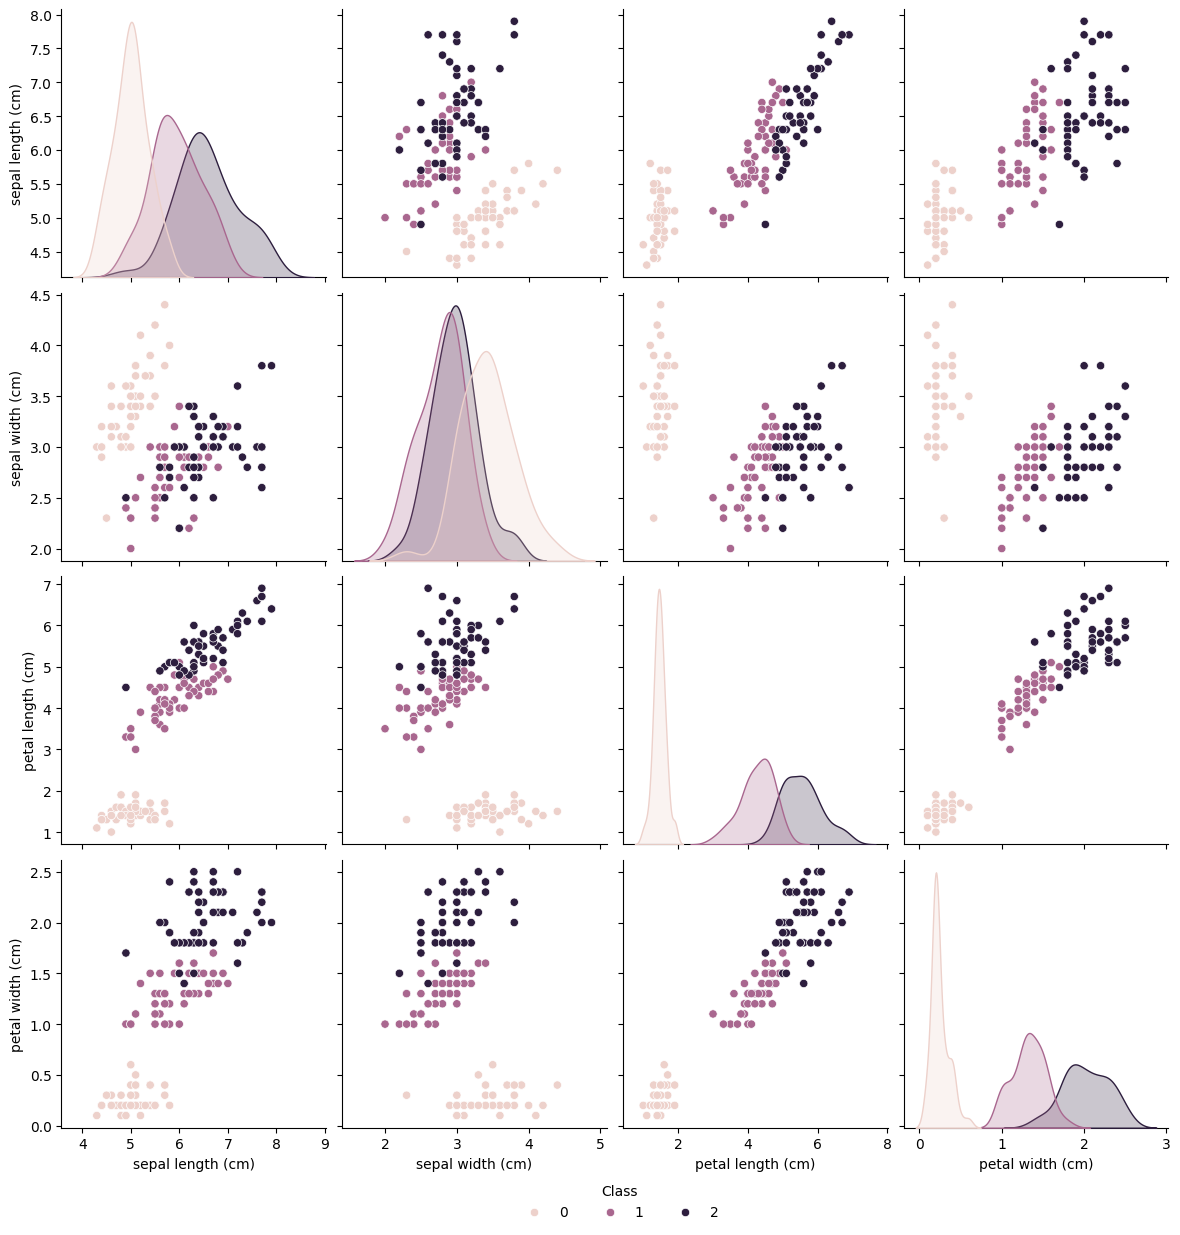

In [15]:
plt.figure(figsize=(12,12))
g = sns.pairplot(data=iris, hue="Class", height=3)
sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.035), ncol=3, title='Class', frameon=False)

#### **Clustering**

For this example, we are going to use **K-Means Clustering**, a distance-based algorithm.

K-Means aims to partition the data into **k** clusters (where *k* is chosen in advance). The algorithm works iteratively:

1. **Initialize** *k* cluster centers (centroids), typically by selecting starting positions automatically (often at random).
2. **Assign** each data point to the cluster with the nearest centroid (based on distance).
3. **Update** each centroid by taking the mean of all points assigned to that cluster.

Steps 2–3 repeat until the assignments stop changing (or a maximum number of iterations is reached). The final result is a set of cluster labels and cluster centers.

*Because K-Means is distance-based, it is usually important to **scale features** before clustering.*

Learn more about K-Means Clustering and other types of clustering methods **[here](https://scikit-learn.org/stable/modules/clustering.html#k-means)**

Learn more about how to use K-Means Clustering function **[here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**

Let's start by importing KMeans.

In [3]:
from sklearn.cluster import KMeans

Next, we want to find the optimum number of clusters for k-means classification. The KMeans algorithm clusters data by minimizing what is known as the inertia (the within-cluster sum-of-squares). To find the optimum number of clusters, we must first calculate the within-cluster sum-of-squares. We do this using only the features. For this to work, our feature data must be in array form.

In [16]:
feat_array = standardized_data.values

In [17]:
wcss = []

for k in range(1, 11): # sets k in the range of 1 - 11
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(feat_array)
    wcss.append(kmeans.inertia_)

# max_iter is the number of iterations of the k-means algorithm in a single run (number of times the centroid is recomputed)
# the n_init is the number of times the k-means algorithm is run with different centroid seeds

We then use something known as the elbow method to determine the optimal number of clusters for k-means clustering.

Here, we know that there should be three clusters, but otherwise we pick the 'elbow' of the curve as the optimum number of clusters, i.e. where adding another cluster does not allow for much better modelling of the data.

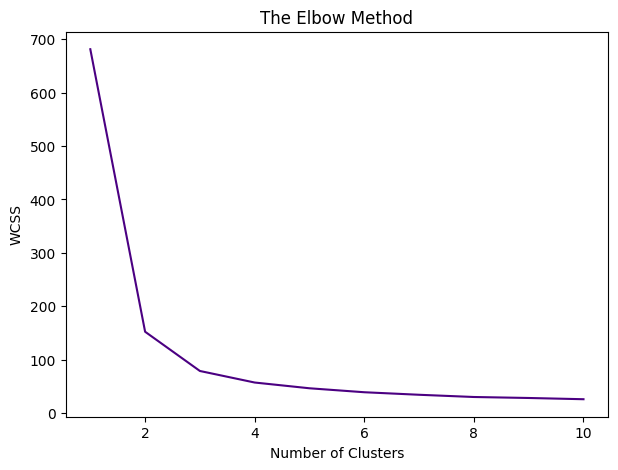

In [18]:
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, color='indigo')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Now we've found the optimum number of clusters, we can implement K-Means clustering.

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(feat_array) # predict the cluster index of each sample

We can then visualise the clusters.

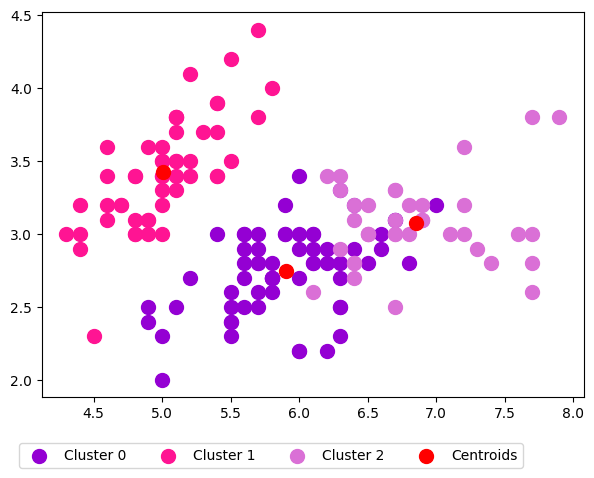

In [20]:
fig,axes = plt.subplots(figsize=(7,5))

# visualising the clusters
plt.scatter(feat_array[y_kmeans == 0, 0], feat_array[y_kmeans == 0, 1], s = 100, c = 'darkviolet', label = 'Cluster 0')
plt.scatter(feat_array[y_kmeans == 1, 0], feat_array[y_kmeans == 1, 1], s = 100, c = 'deeppink', label = 'Cluster 1')
plt.scatter(feat_array[y_kmeans == 2, 0], feat_array[y_kmeans == 2, 1], s = 100, c = 'orchid', label = 'Cluster 2')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

# plots legend outside of the grid, bottom centre of the figure
plt.legend(ncol = 4, bbox_to_anchor=(0.9, -0.1))

#### **Exlainability**

While the scatterplot above provides a good visual overview of how well our clusters separate, it is very important to understand which features are driving this separation. The remainder of this tutorial will therefore focuses on explaining the clustering results.

We want to understand how our samples cluster, and the easiest way to do this is to use the mean of their characteristics. We call this process **profiling**.

For these next visualisations, we need to install and import plotly, an open-source plotting library in python.

Learn more here: https://plotly.com

In [2]:
!pip install --user plotly -U

In [ ]:
import plotly as plotly
import plotly.express as px

Now, we want to visualise the mean of each feature variable by cluster.

In [ ]:
kmeans.fit(feat_array) # fit the model
clusters = standardized_data.copy()
clusters['Cluster'] = kmeans.labels_ # assigns cluster labels to features
polar = clusters.groupby("Cluster").mean().reset_index() # finds the mean of each feature variable by cluster
polar = pd.melt(polar, id_vars=["Cluster"])
fig = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True, height=400, width=700, color_discrete_sequence=['darkviolet','deeppink','orchid'], template="plotly_dark")
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.05,
    xanchor="right",
    x=1.05
))
fig.show()

It's also useful to be able to visualise how many samples are in each cluster.

In [ ]:
pie = clusters.groupby('Cluster').size().reset_index()
pie.columns=['Cluster','Value']
fig = px.pie(pie, values='Value', names='Cluster', color='Cluster', category_orders={"Cluster": ["0", "1", "2"]}, height=400, width=700, color_discrete_sequence=['darkviolet','deeppink','orchid'], template="plotly_dark")
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.05,
    xanchor="right",
    x=1.05
))
fig.show()


From these plots, we can understand the characteristics of each cluster of irises.

For example, if you look at Cluster 1, you can understand that the petal width, petal length, and sepal length of these irises were much smaller than in the other two clusters but that they're sepal width was a lot larger.

Clusters 0 and 2 have a similar shape, with Cluster 2 having consistently larger measurements than Cluster 0.

Finally, you can apply names to your clusters based on these characteristics.

- Cluster 0 is "the small irises"/"the common irises"
- Cluster 1 is "the wide sepal irises"
- Cluster 2 is "the common irises"/"the large irises"

What happens if you refit the K-Means model with 5 clusters? Visualise the new cluster assignments.

In [ ]:
## CODE HERE ##
# Refit KMeans with 5 clusters
kmeans5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans5 = kmeans5.fit_predict(feat_array)

# Visualise the clusters using the first two features (columns 0 and 1)
plt.figure(figsize=(7, 5))

for c in range(5):
    plt.scatter(
        feat_array[y_kmeans5 == c, 0],
        feat_array[y_kmeans5 == c, 1],
        s=80,
        label=f'Cluster {c}'
    )

# Plot centroids
plt.scatter(
    kmeans5.cluster_centers_[:, 0],
    kmeans5.cluster_centers_[:, 1],
    s=120,
    c='red',
    label='Centroids'
)

plt.title('K-Means Clustering (k=5)')
plt.xlabel('Feature 1 (standardised)')
plt.ylabel('Feature 2 (standardised)')
plt.legend()
plt.show()


And that's it! You've learnt the basics of clustering.

Now you've finished this tutorial, follow the instructions and complete the assessment.